<a href="https://colab.research.google.com/github/akankshsathish/EDA-and-ML-projects/blob/main/CO2_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Predicting CO2 Emissions with Linear Regression**

![](https://www.frost.com/wp-content/uploads/2022/06/GettyImages-1294597903-1.jpg)

This dataset contains details of how the Carbon-di-Oxide emissions are affected by various factors.
All this data is captured from the official open data website of Canada Government over a period of 7 years.


###Model

-- 4WD/4X4 = Four-wheel drive

-- AWD = All-wheel drive

-- FFV = Flexible-fuel vehicle

-- SWB = Short wheelbase

-- LWB = Long wheelbase

-- EWB = Extended wheelbase


###Transmission

-- A = Automatic

-- AM = Automated manual

-- AS = Automatic with select shift

-- AV = Continuously variable

-- M = Manual

-- 3 - 10 = Number of gears


###Fuel type

-- X = Regular gasoline

-- Z = Premium gasoline

-- D = Diesel

-- E = Ethanol (E85)

-- N = Natural gas


###Fuel Consumption

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)


###CO2 Emissions

The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
emissions_df = pd.read_csv('/content/co2_emissions_canada.csv')
emissions_df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [ ]:
emissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
emissions_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [ ]:
emissions_df.rename({'Vehicle Class': 'vehicle_class',
                      'Engine Size(L)': 'engine_size',
                      'Fuel Type': 'fuel_type',
                      'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
                      'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_high',
                      'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
                      'Fuel Consumption Comb (mpg)': 'mpg_fuel_cons_comb',
                      'CO2 Emissions(g/km)': 'co2_emissions'}, axis='columns', inplace=True)
emissions_df

,Make,Model,vehicle_class,engine_size,Cylinders,Transmission,fuel_type,fuel_cons_city,fuel_cons_high,fuel_cons_comb,mpg_fuel_cons_comb,co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [ ]:
emissions_df.columns

Index(['Make', 'Model', 'vehicle_class', 'engine_size', 'Cylinders',
       'Transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_high',
       'fuel_cons_comb', 'mpg_fuel_cons_comb', 'co2_emissions'],
      dtype='object')

# **Exploratory Data Analysis**

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

####**Let us have a look at the different automobile manufacturers**

In [ ]:
emissions_df.Make.unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

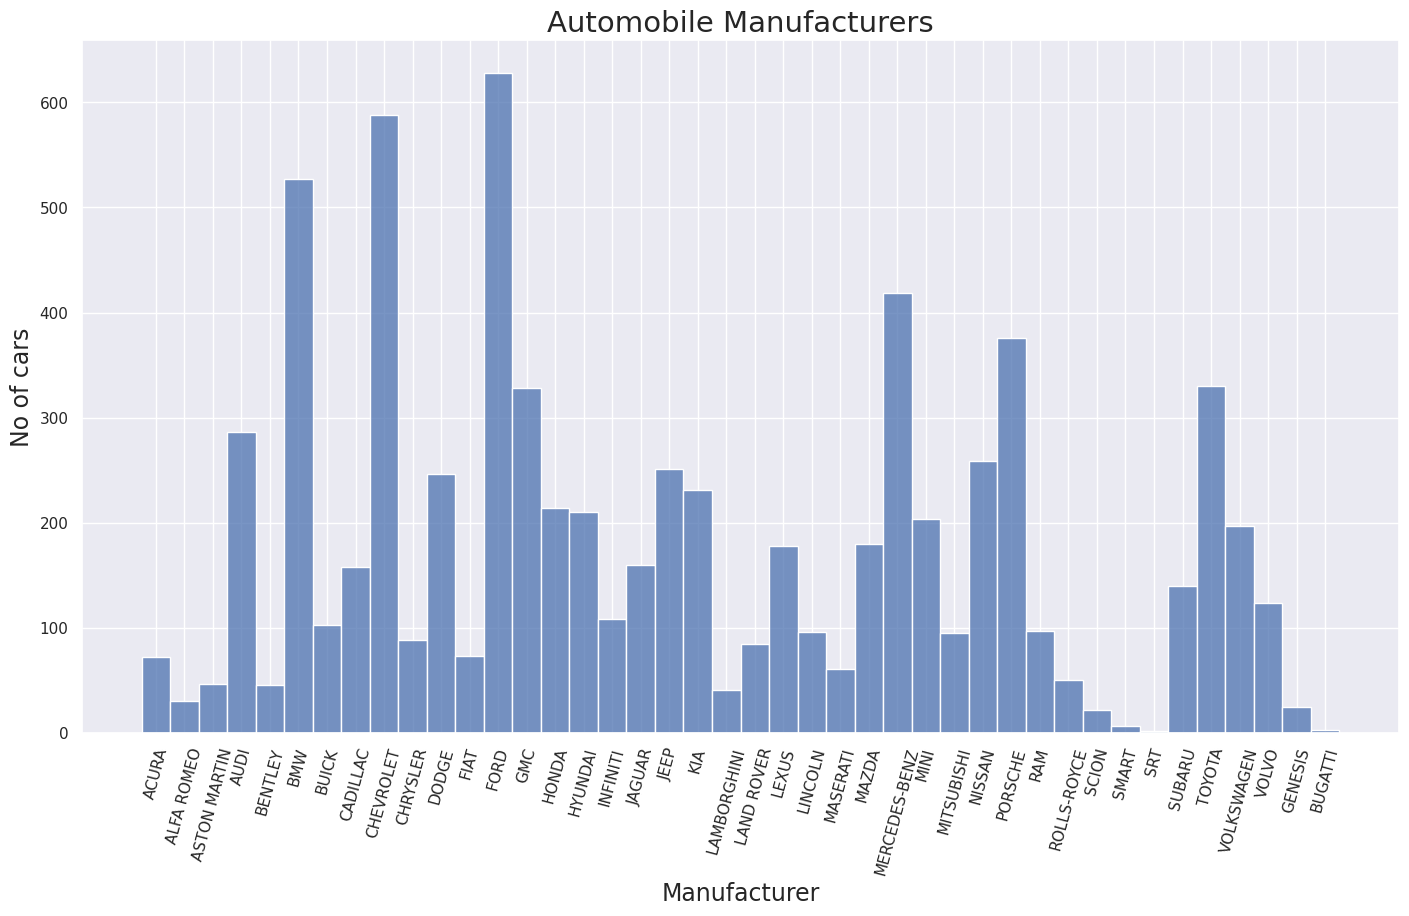

In [ ]:
plt.figure(figsize=(17,9))
sns.histplot(emissions_df, x='Make')
plt.title('Automobile Manufacturers', fontsize=21)
plt.xlabel('Manufacturer', fontsize=17)
plt.ylabel('No of cars', fontsize=17)
plt.xticks(rotation=75);

#### **Let's now check the CO2 emissions against some features and analyze the pattern**

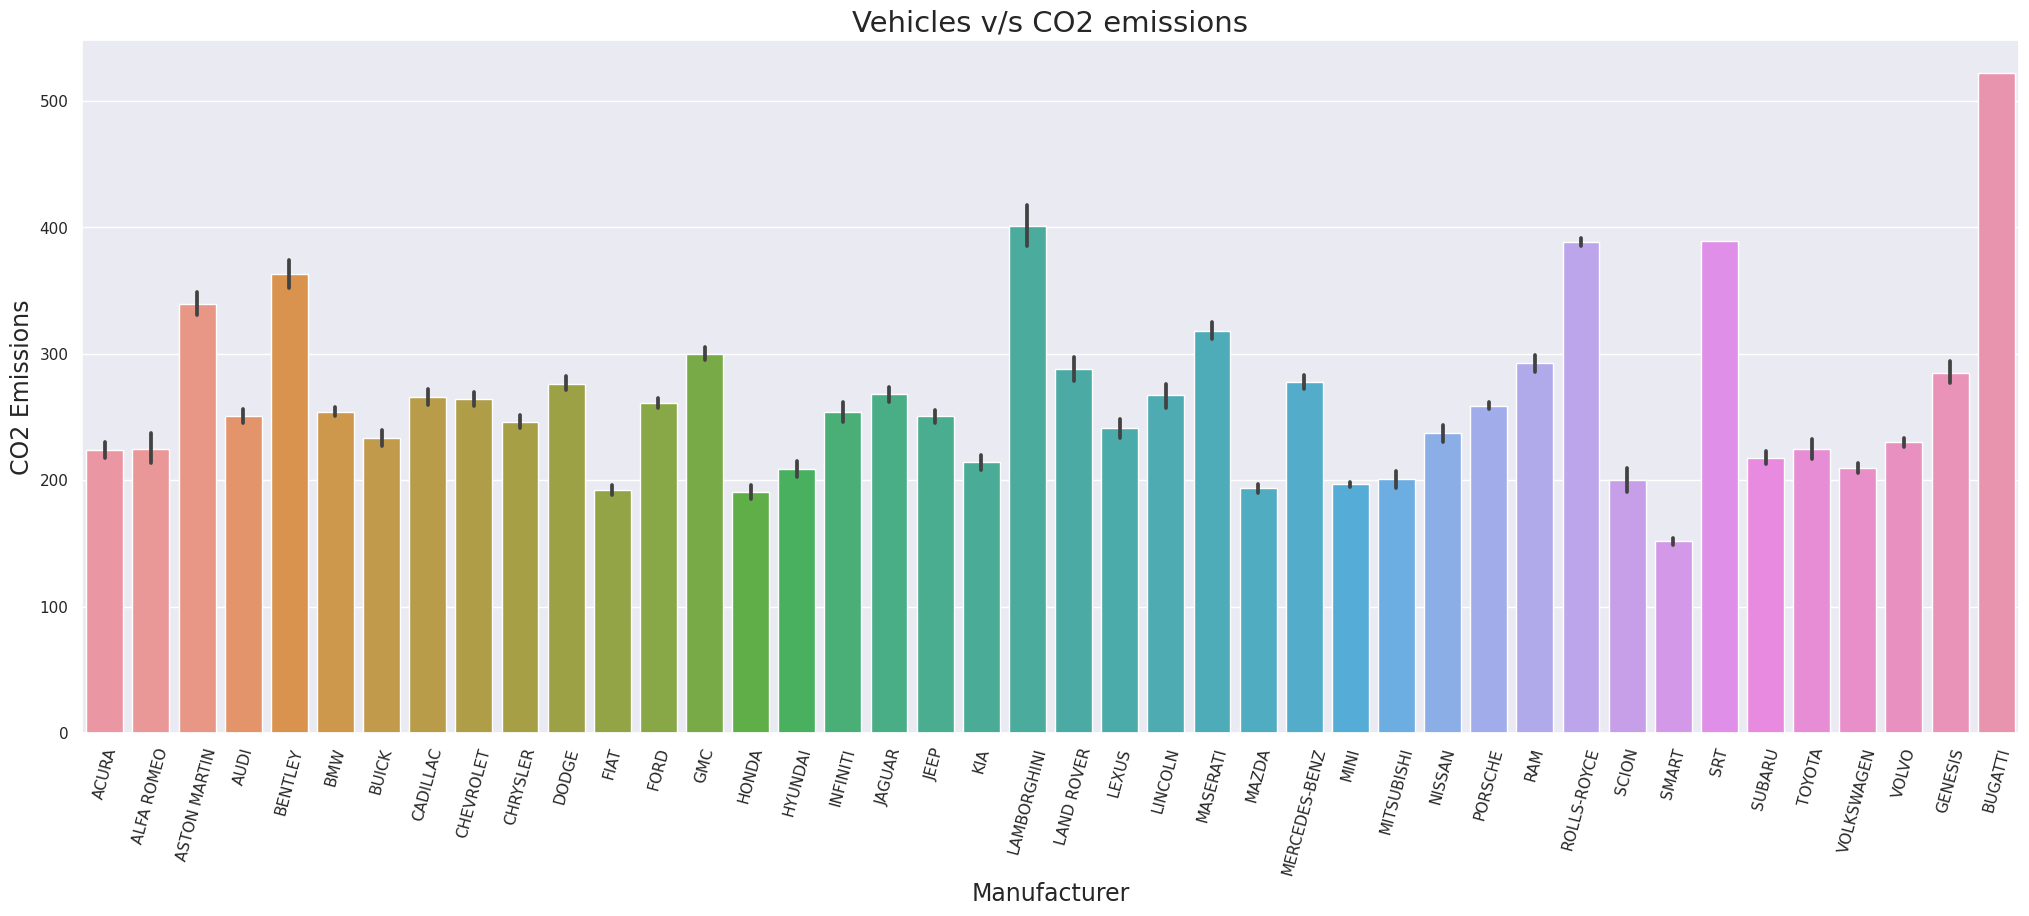

In [ ]:
plt.figure(figsize=(25,9))
sns.set_theme(style='darkgrid')
sns.barplot(emissions_df, x='Make', y='co2_emissions')
plt.title('Vehicles v/s CO2 emissions', fontsize=21)
plt.xlabel('Manufacturer', fontsize=17)
plt.ylabel('CO2 Emissions', fontsize=17)
plt.xticks(rotation=75);

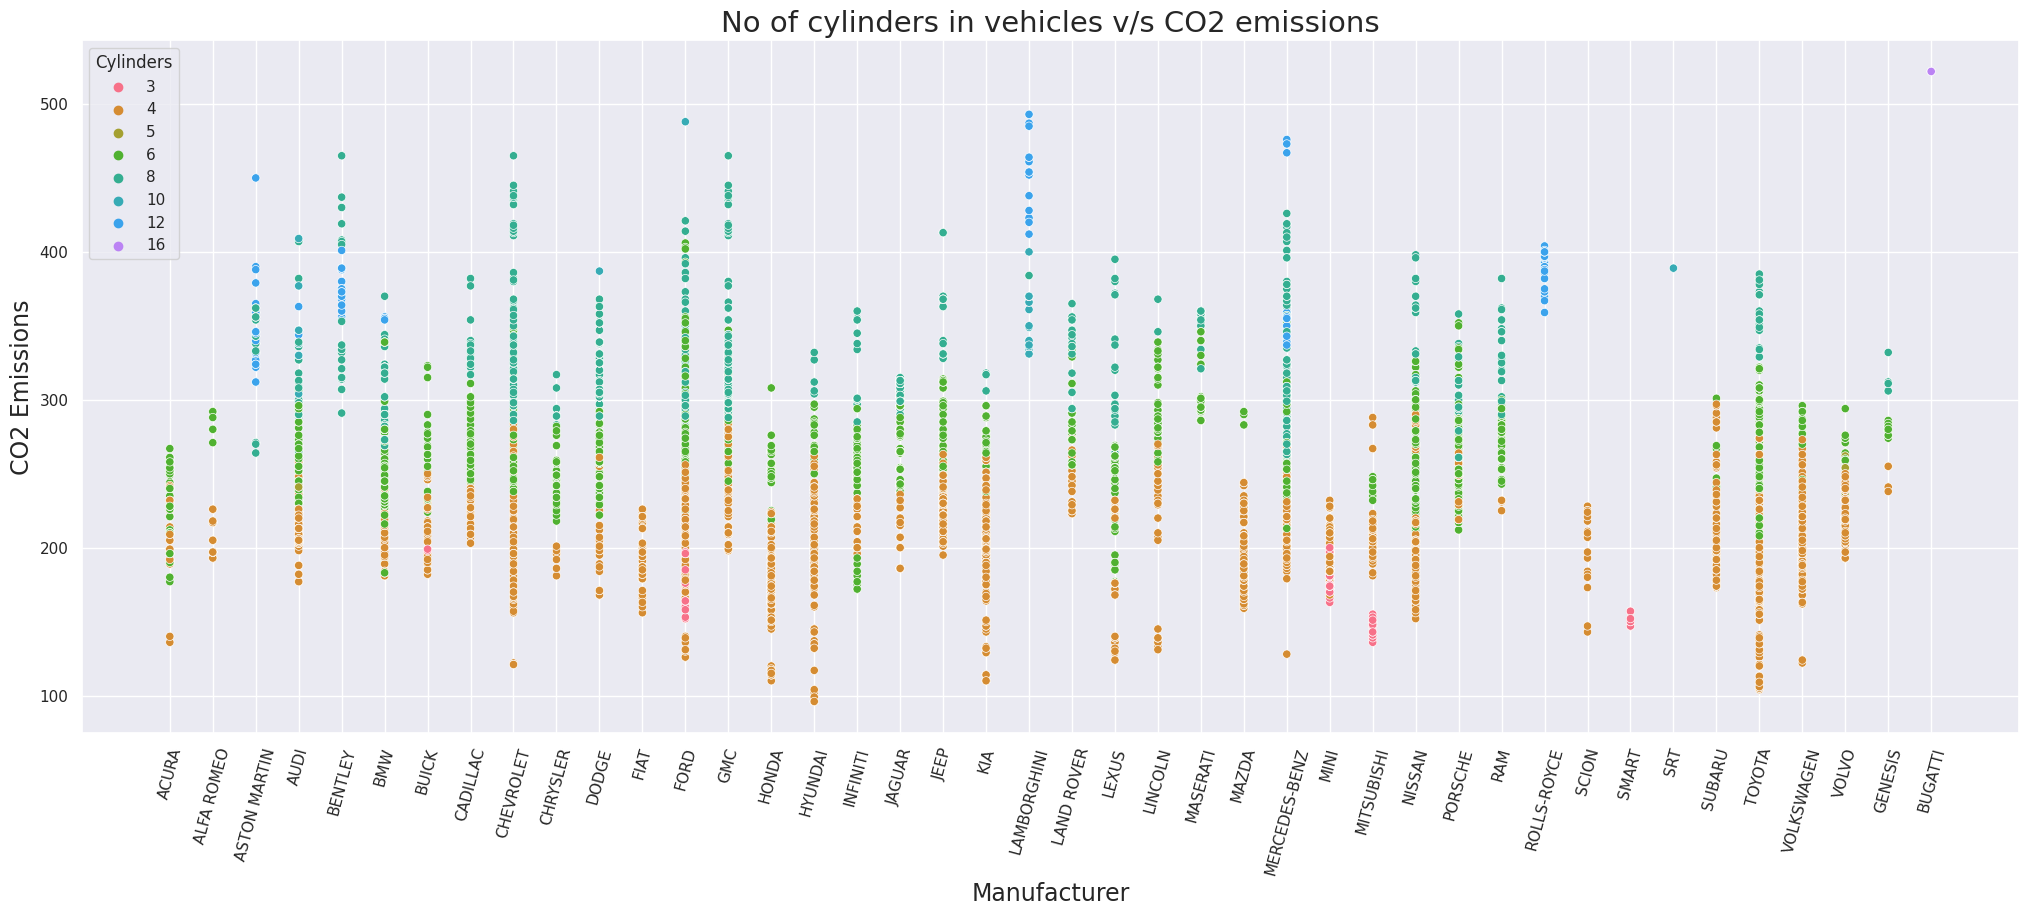

In [ ]:
from seaborn.widgets import color_palette
plt.figure(figsize=(25,9))
sns.set_theme(style='darkgrid')
sns.scatterplot(emissions_df, x='Make', y='co2_emissions', hue='Cylinders', palette=sns.color_palette("husl", 9))
plt.title('No of cylinders in vehicles v/s CO2 emissions', fontsize=21)
plt.xlabel('Manufacturer', fontsize=17)
plt.ylabel('CO2 Emissions', fontsize=17)
plt.xticks(rotation=75);

    From the above graphs, we can deduce that Bugatti produces the highest CO2 emissions amongst all the makers. They also seem to have the highest
    number of cylinders which means there is a strong positive correlation between the number of cylinders and the emissions.

In [ ]:
emissions_df.Cylinders.value_counts()

4     3220
6     2446
8     1402
12     151
3       95
10      42
5       26
16       3
Name: Cylinders, dtype: int64

In [ ]:
fig=px.histogram(emissions_df, x='Cylinders')
fig.update_layout(xaxis_title="Cylinders ", yaxis_title="No of vehicles", title_text='Cylinders in Vehicles', title_x=0.5)
fig.show()

    More than 95% of the vehicles have either 4, 6 or 8 cylinders in them.

#### **Let's plot the distribution of various transmissions**

In [ ]:
emissions_df.Transmission.value_counts(normalize=True)

AS6     0.179282
AS8     0.163981
M6      0.122004
A6      0.106838
A8      0.066351
AM7     0.060257
A9      0.045904
AS7     0.043196
AV      0.039946
M5      0.026134
AS10    0.022749
AM6     0.017874
AV7     0.015978
AV6     0.015301
M7      0.012322
A5      0.011374
AS9     0.010427
A4      0.008802
AM8     0.008395
A7      0.007177
AV8     0.005281
A10     0.004198
AS5     0.003521
AV10    0.001490
AM5     0.000542
AM9     0.000406
AS4     0.000271
Name: Transmission, dtype: float64

In [ ]:
fig = px.pie(emissions_df, values=emissions_df.Transmission.value_counts(), names=emissions_df.Transmission.value_counts().index)
fig.show()

In [ ]:
emissions_df.fuel_type.value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: fuel_type, dtype: int64

In [ ]:
fig = px.scatter(emissions_df, x='fuel_cons_city', y='co2_emissions', color='fuel_type', symbol='fuel_type', color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(xaxis_title='Fuel Consumption in City(L/100km)', yaxis_title='CO2 Emission', title='Fuel Consumption v/s CO2 Emission(City)', title_x=0.5)
fig.show()

In [ ]:
px.scatter(emissions_df, x='fuel_cons_high', y='co2_emissions', color='fuel_type', symbol='fuel_type', color_discrete_sequence=px.colors.qualitative.D3)
fig.update_layout(xaxis_title='Fuel Consumption in Highway(L/100km)', yaxis_title='CO2 Emission', title='Fuel Consumption v/s CO2 Emission(Highway)', title_x=0.5)
fig.show()

    Premium Gasoline(Z) and Regular Gasoline(X) are the two most used fuel types amongst automobiles both in cities and highways

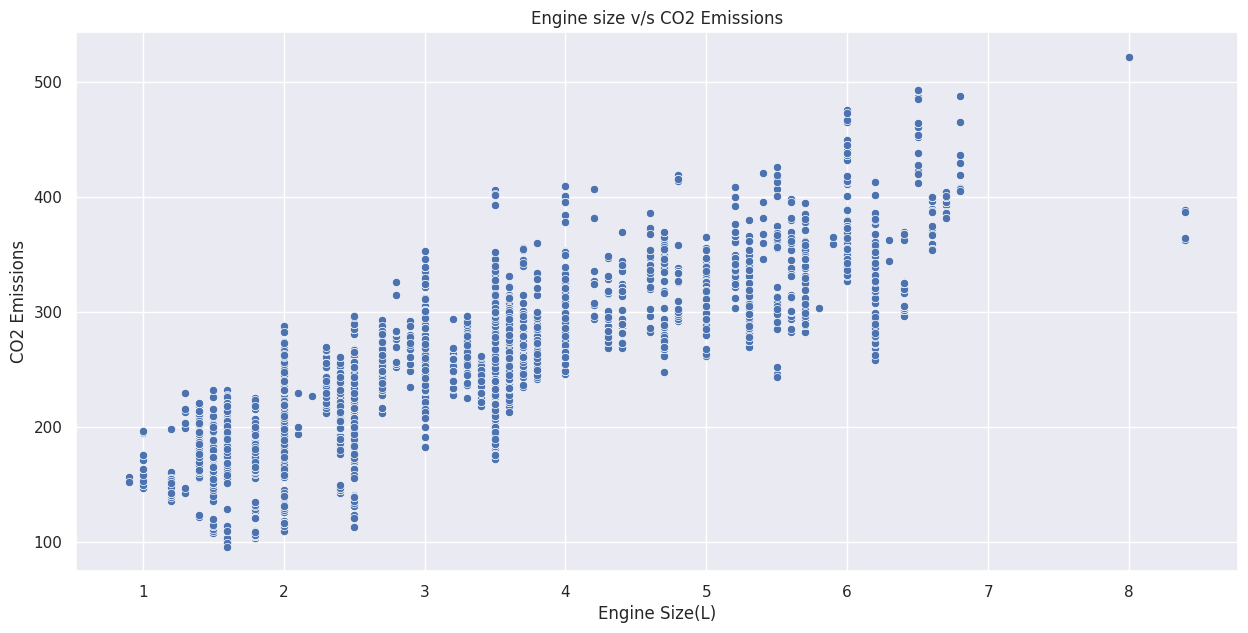

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(emissions_df, x='engine_size', y='co2_emissions')
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions')
plt.title('Engine size v/s CO2 Emissions');

In [ ]:
emissions_df.corr()

,engine_size,Cylinders,fuel_cons_city,fuel_cons_high,fuel_cons_comb,mpg_fuel_cons_comb,co2_emissions
engine_size,1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
fuel_cons_city,0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
fuel_cons_high,0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
fuel_cons_comb,0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
mpg_fuel_cons_comb,-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
co2_emissions,0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


<Axes: >

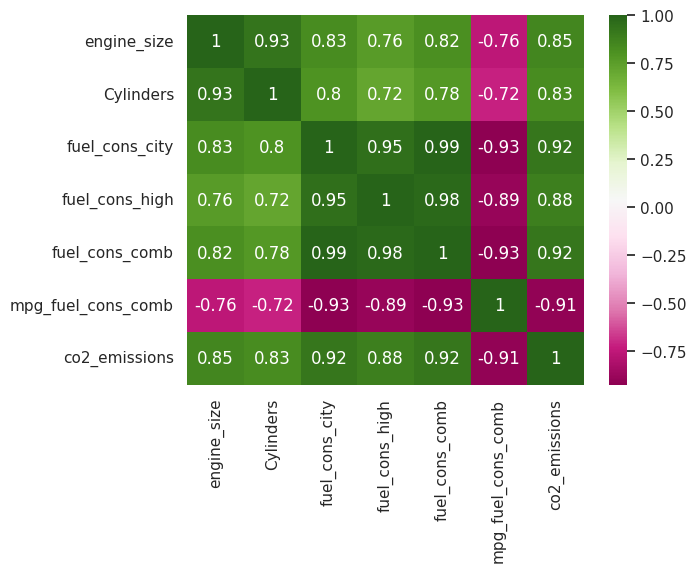

In [ ]:
sns.heatmap(emissions_df.corr(), annot=True, cmap='PiYG')

## **Simple Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
#numeric_cols = emissions_df.select_dtypes(include=np.number).columns.tolist()
#X = emissions_df[numeric_cols[:-1]]
#y = emissions_df[[numeric_cols[-1]]]

In [ ]:
feature_cols = ['engine_size']
X=emissions_df[feature_cols]
y=emissions_df['co2_emissions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Result of MAE
print("Mean Absolute error:", metrics.mean_absolute_error(y_test, y_pred))

# Result of MSE
print("Mean Squared error:", metrics.mean_squared_error(y_test, y_pred))

# Result of RMSE
print("Root Mean Squared error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Result of R2 score
print("Correlation coefficient:", metrics.r2_score(y_test, y_pred))


Mean Absolute error: 23.375804661893387
Mean Squared error: 943.2165402784914
Root Mean Squared error: 30.711830624019978
Correlation coefficient: 0.7367631386964618


## **Multiple Linear Regression**

In [ ]:
feature_cols = ['engine_size', 'Cylinders', 'fuel_cons_comb', 'mpg_fuel_cons_comb']
X=emissions_df[feature_cols]
y=emissions_df['co2_emissions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Result of MAE
print("Mean Absolute error:", metrics.mean_absolute_error(y_test, y_pred))

# Result of MSE
print("Mean Squared error:", metrics.mean_squared_error(y_test, y_pred))

# Result of RMSE
print("Root Mean Squared error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Result of R2 score
print("Correlation coefficient:", metrics.r2_score(y_test, y_pred))


Mean Absolute error: 11.325151775488814
Mean Squared error: 324.764208886144
Root Mean Squared error: 18.021215521882645
Correlation coefficient: 0.9014782039410275


## **Using Categorical features for Machine Learning**

#### **Since the number of categories are relatively high, we will apply One Hot Encoding technique**

#### **Let's perform One Hot Encoding on the 'Vehicle Class' feature**

In [ ]:
from sklearn import preprocessing
encode_vehicle_class = preprocessing.OneHotEncoder()
encode_vehicle_class.fit(emissions_df[['vehicle_class']])
encode_vehicle_class.categories_

[array(['COMPACT', 'FULL-SIZE', 'MID-SIZE', 'MINICOMPACT', 'MINIVAN',
        'PICKUP TRUCK - SMALL', 'PICKUP TRUCK - STANDARD',
        'SPECIAL PURPOSE VEHICLE', 'STATION WAGON - MID-SIZE',
        'STATION WAGON - SMALL', 'SUBCOMPACT', 'SUV - SMALL',
        'SUV - STANDARD', 'TWO-SEATER', 'VAN - CARGO', 'VAN - PASSENGER'],
       dtype=object)]

In [ ]:
#import numpy as np
#np.set_printoptions(threshold=np.inf)

In [ ]:
one_hot_vehicle_class = encode_vehicle_class.transform(emissions_df[['vehicle_class']]).toarray()
one_hot_vehicle_class

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
emissions_df[['COMPACT', 'FULL-SIZE', 'MID-SIZE', 'MINICOMPACT', 'MINIVAN',
        'PICKUP TRUCK - SMALL', 'PICKUP TRUCK - STANDARD',
        'SPECIAL PURPOSE VEHICLE', 'STATION WAGON - MID-SIZE',
        'STATION WAGON - SMALL', 'SUBCOMPACT', 'SUV - SMALL',
        'SUV - STANDARD', 'TWO-SEATER', 'VAN - CARGO', 'VAN - PASSENGER']] = one_hot_vehicle_class
emissions_df

,Make,Model,vehicle_class,engine_size,Cylinders,Transmission,fuel_type,fuel_cons_city,fuel_cons_high,fuel_cons_comb,...,PICKUP TRUCK - STANDARD,SPECIAL PURPOSE VEHICLE,STATION WAGON - MID-SIZE,STATION WAGON - SMALL,SUBCOMPACT,SUV - SMALL,SUV - STANDARD,TWO-SEATER,VAN - CARGO,VAN - PASSENGER
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
feature_cols = ['engine_size', 'Cylinders', 'fuel_cons_comb', 'mpg_fuel_cons_comb', 'COMPACT', 'FULL-SIZE', 'MID-SIZE', 'MINICOMPACT', 'MINIVAN',
        'PICKUP TRUCK - SMALL', 'PICKUP TRUCK - STANDARD',
        'SPECIAL PURPOSE VEHICLE', 'STATION WAGON - MID-SIZE',
        'STATION WAGON - SMALL', 'SUBCOMPACT', 'SUV - SMALL',
        'SUV - STANDARD', 'TWO-SEATER', 'VAN - CARGO', 'VAN - PASSENGER']
X=emissions_df[feature_cols]
y=emissions_df['co2_emissions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Result of MAE
print("Mean Absolute error:", metrics.mean_absolute_error(y_test, y_pred))

# Result of MSE
print("Mean Squared error:", metrics.mean_squared_error(y_test, y_pred))

# Result of RMSE
print("Root Mean Squared error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Result of R2 score
print("Correlation coefficient:", metrics.r2_score(y_test, y_pred))

Mean Absolute error: 11.11814315463175
Mean Squared error: 289.05467841983
Root Mean Squared error: 17.001608112758923
Correlation coefficient: 0.9162978933763797


#### **Let's perform One Hot Encoding on the 'Fuel Type' feature**

In [ ]:
encode_fuel_type = preprocessing.OneHotEncoder()
encode_fuel_type.fit(emissions_df[['fuel_type']])
encode_fuel_type.categories_

[array(['D', 'E', 'N', 'X', 'Z'], dtype=object)]

In [ ]:
one_hot_fuel_type = encode_fuel_type.transform(emissions_df[['fuel_type']]).toarray()
one_hot_fuel_type

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [ ]:
emissions_df[['D', 'E', 'N', 'X', 'Z']] = one_hot_fuel_type
emissions_df

,Make,Model,vehicle_class,engine_size,Cylinders,Transmission,fuel_type,fuel_cons_city,fuel_cons_high,fuel_cons_comb,...,SUV - SMALL,SUV - STANDARD,TWO-SEATER,VAN - CARGO,VAN - PASSENGER,D,E,N,X,Z
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
feature_cols = ['engine_size', 'Cylinders', 'fuel_cons_comb', 'mpg_fuel_cons_comb', 'COMPACT', 'FULL-SIZE', 'MID-SIZE', 'MINICOMPACT', 'MINIVAN',
        'PICKUP TRUCK - SMALL', 'PICKUP TRUCK - STANDARD',
        'SPECIAL PURPOSE VEHICLE', 'STATION WAGON - MID-SIZE',
        'STATION WAGON - SMALL', 'SUBCOMPACT', 'SUV - SMALL',
        'SUV - STANDARD', 'TWO-SEATER', 'VAN - CARGO', 'VAN - PASSENGER',
        'D', 'E', 'N', 'X', 'Z']
X=emissions_df[feature_cols]
y=emissions_df['co2_emissions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Result of MAE
print("Mean Absolute error:", metrics.mean_absolute_error(y_test, y_pred))

# Result of MSE
print("Mean Squared error:", metrics.mean_squared_error(y_test, y_pred))

# Result of RMSE
print("Root Mean Squared error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Result of R2 score
print("Correlation coefficient:", metrics.r2_score(y_test, y_pred))

Mean Absolute error: 2.979611159986147
Mean Squared error: 21.57108891443356
Root Mean Squared error: 4.644468636392495
Correlation coefficient: 0.9938385330177737


In [ ]:
from sklearn.metrics import accuracy_score

## **Let's figure out what features contribute majorly towards accuracy of the model**

In [ ]:
model.coef_

array([ 6.18985260e-02,  1.12953292e+00,  2.01593127e+01, -7.84742568e-01,
        6.50256494e-01,  1.61214023e+00,  8.52987534e-01, -5.20043003e-01,
        8.19445541e-01,  3.31048562e+00,  2.20372269e+00,  4.03740542e+00,
        2.46948977e-01,  7.30865626e-01,  4.46797987e-01,  9.89014991e-01,
        1.67195970e+00,  1.35433350e+00, -1.32094128e+01, -5.19690850e+00,
        6.18562608e+01, -7.63294358e+01, -4.96101678e+01,  3.21833386e+01,
        3.19000042e+01])

In [ ]:
model.intercept_

15.998212697361254

In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(feature_cols, 'INTERCEPT'),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values(by='weight', ascending=False)

,feature,weight
20,D,61.856261
23,X,32.183339
24,Z,31.900004
2,fuel_cons_comb,20.159313
25,INTERCEPT,15.998213
11,SPECIAL PURPOSE VEHICLE,4.037405
9,PICKUP TRUCK - SMALL,3.310486
10,PICKUP TRUCK - STANDARD,2.203723
16,SUV - STANDARD,1.671960
5,FULL-SIZE,1.612140
